<a href="https://colab.research.google.com/github/sanapati-suman-git/ML_Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Logistic Regression**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df.drop('target', axis=1)
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred_log = logreg.predict(X_test)

acc_log=accuracy_score(y_test, y_pred_log)
# Evaluation
print("Accuracy:", acc_log)
print("\n")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_log))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Accuracy: 0.8524590163934426


Confusion Matrix: 
 [[25  4]
 [ 5 27]]


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



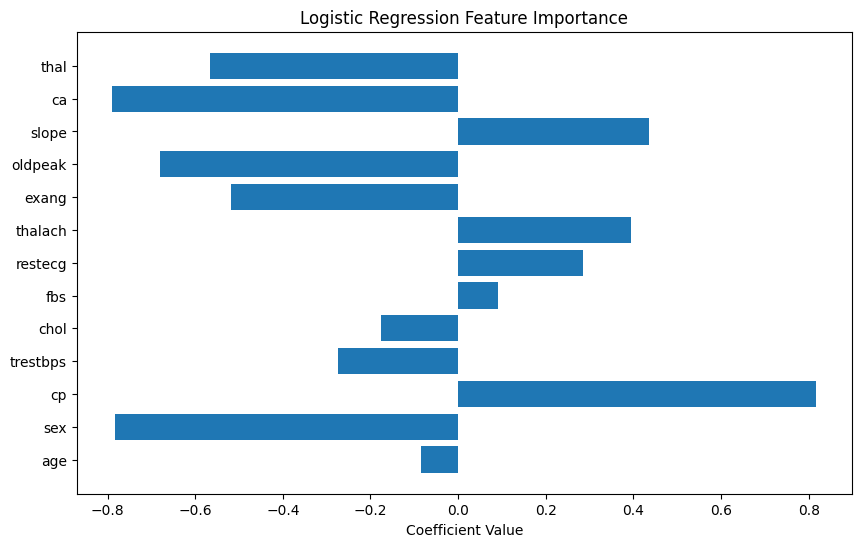

Confusion Matrix:
 [[25  4]
 [ 5 27]]


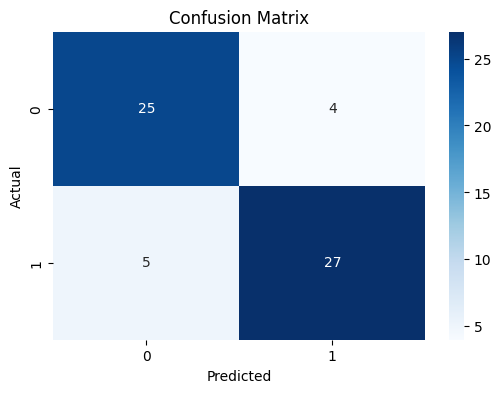

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming logistic regression model is trained as 'logreg'
coefficients = logreg.coef_[0]
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, coefficients)
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Importance")
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have y_test and y_pred
cm = confusion_matrix(y_test, y_pred_log)

# Print the raw confusion matrix
print("Confusion Matrix:\n", cm)

# Optional: Visualize it as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)  # max_depth to avoid overfitting
dt_model.fit(X_train, y_train)

# Predict
y_pred_tree = dt_model.predict(X_test)

acc_tree=accuracy_score(y_test, y_pred_tree)
# Evaluate
print("Accuracy:",acc_tree )
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Accuracy: 0.8524590163934426
Confusion Matrix:
 [[26  3]
 [ 6 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



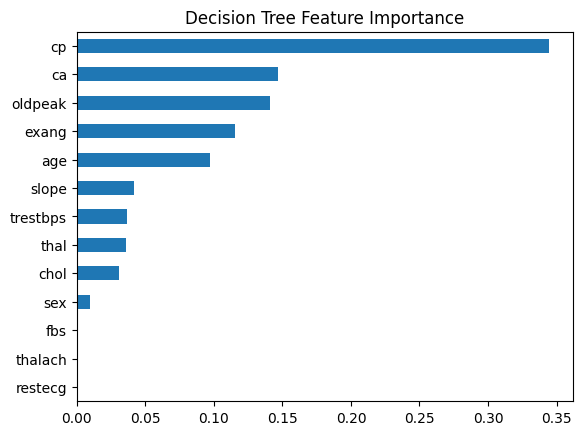

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = dt_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=True)

feat_imp.plot(kind='barh')
plt.title("Decision Tree Feature Importance")
plt.show()


**Full code**

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

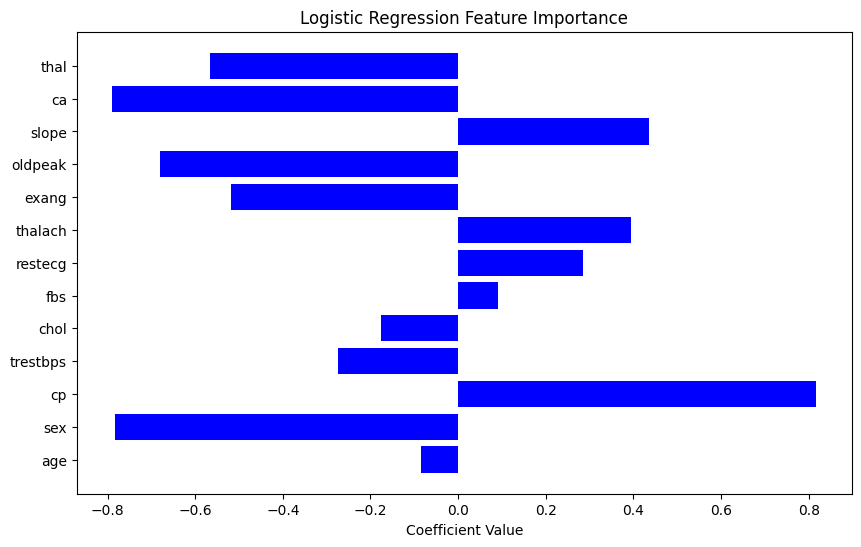

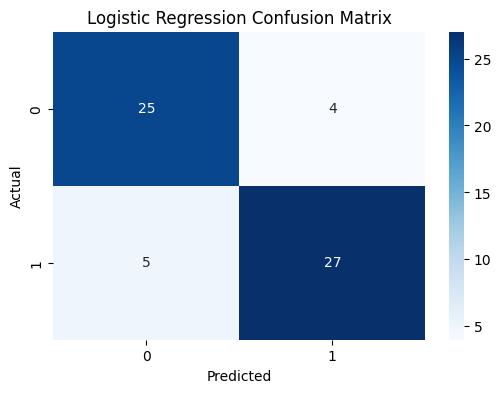

Decision Tree Accuracy: 0.8524590163934426
Confusion Matrix:
 [[26  3]
 [ 6 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



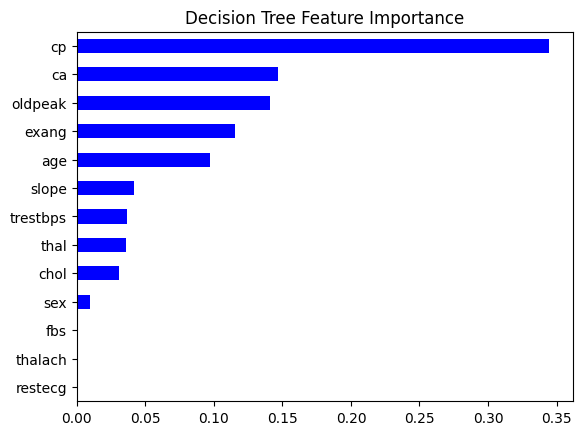

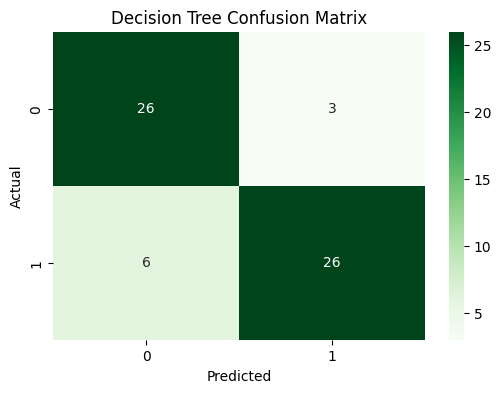


Decision Maker (based on higher accuracy): Logistic Regression
Accuracy of Decision Maker: 0.852
Number of patients predicted at risk: 31
Number of patients predicted not at risk: 30


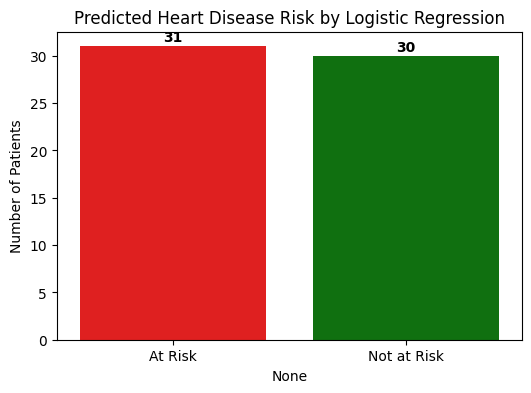

In [ ]:
# ==============================
# Heart Disease Prediction
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Load data ---
df = pd.read_csv("/content/sample_data/heart.csv")
print(df.head())
df.info()
print("\n")

# --- Features and target ---
X = df.drop('target', axis=1)
y = df['target']

# --- Split dataset ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# Logistic Regression
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_log = logreg.predict(X_test_scaled)
acc_log = accuracy_score(y_test, y_pred_log)

print("Logistic Regression Accuracy:", acc_log)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Feature importance (coefficients)
coefficients = logreg.coef_[0]
features = X.columns
plt.figure(figsize=(10,6))
plt.barh(features, coefficients, color='Blue')
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Importance")
plt.show()

# Confusion Matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# ===============================
# Decision Tree
# ===============================
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(X_train.values, y_train)

y_pred_tree = dt_model.predict(X_test.values)
acc_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Accuracy:", acc_tree)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Feature importance
importances = dt_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh', color='Blue')
plt.title("Decision Tree Feature Importance")
plt.show()

# Confusion Matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# ===============================
# Decision Maker based on Accuracy
# ===============================
if acc_log >= acc_tree:
    decision_maker = 'Logistic Regression'
    y_prob = logreg.predict_proba(X_test_scaled)[:,1]
    y_pred_final = (y_prob >= 0.5).astype(int)
else:
    decision_maker = 'Decision Tree'
    y_prob = dt_model.predict_proba(X_test.values)[:,1]
    y_pred_final = (y_prob >= 0.5).astype(int)

# Count patients at risk
num_risk = y_pred_final.sum()
num_no_risk = len(y_pred_final) - num_risk

print(f"\nDecision Maker (based on higher accuracy): {decision_maker}")
print(f"Accuracy of Decision Maker: {max(acc_log, acc_tree):.3f}")
print(f"Number of patients predicted at risk: {num_risk}")
print(f"Number of patients predicted not at risk: {num_no_risk}")

#
# Visualize patients at risk
#
risk_counts = pd.Series([num_risk, num_no_risk], index=['At Risk', 'Not at Risk'])
plt.figure(figsize=(6,4))
sns.barplot(x=risk_counts.index, y=risk_counts.values, palette=['red', 'green'])
plt.ylabel("Number of Patients")
plt.title(f"Predicted Heart Disease Risk by {decision_maker}")
for i, v in enumerate(risk_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')
plt.show()

